# <center> Análise de dados de crédito alemão </center>

Os empréstimos fazem parte integrante das operações bancárias. No entanto, nem todos os empréstimos são prontamente devolvidos e, portanto, é importante que um banco monitore de perto seus pedidos de empréstimo. Este projeto é uma análise dos dados de crédito alemães. Ele contém detalhes de 1.000 solicitantes de empréstimo com 20 atributos e a classificação se um solicitante é considerado um risco de crédito Bom ou Ruim.

Neste projeto, a relação entre o risco de crédito e vários atributos será explorada por meio de técnicas estatísticas básicas e apresentada por meio de visualizações.

## 1. Importando as bibliotecas necessárias e o dataset  

Vamos começar baixando os dados do [repositório UCI Machine Learning](http://archive.ics.uci.edu/ml/about.html). 

In [ ]:
# Importando as bibliotecas necessárias e o dataset 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from urllib.request import urlretrieve
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', 'german.data')
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', \
                  delimiter = ' ', header = None)

## 2. Preparação e Limpeza dos Dados

Vamos ter uma visão geral do conjunto de dados:

In [ ]:
df.info()
print("Algum NaN ou None no DataFrame:", df.isna().any().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB
Algum NaN ou 

In [ ]:
df.dtypes

0     object
1      int64
2     object
3     object
4      int64
5     object
6     object
7      int64
8     object
9     object
10     int64
11    object
12     int64
13    object
14    object
15     int64
16    object
17     int64
18    object
19    object
20     int64
dtype: object

O conjunto de dados contém 21 variáveis e 1000 observações. 8 variáveis são do tipo numérico e 13 do tipo objeto. Como as variáveis do tipo objeto não possuem nenhum valor nulo, podemos concluir que elas são do tipo categórico.

Em seguida, vamos rotular as variáveis para facilitar o uso. O documento que descreve o conjunto de dados pode ser consultado para isso:

In [ ]:
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc', 'german.doc')
f = open('german.doc')
german_doc = f.read()
print(german_doc)

Description of the German credit dataset.

1. Title: German Credit data

2. Source Information

Professor Dr. Hans Hofmann  
Institut f"ur Statistik und "Okonometrie  
Universit"at Hamburg  
FB Wirtschaftswissenschaften  
Von-Melle-Park 5    
2000 Hamburg 13 

3. Number of Instances:  1000

Two datasets are provided.  the original dataset, in the form provided
by Prof. Hofmann, contains categorical/symbolic attributes and
is in the file "german.data".   
 
For algorithms that need numerical attributes, Strathclyde University 
produced the file "german.data-numeric".  This file has been edited 
and several indicator variables added to make it suitable for 
algorithms which cannot cope with categorical variables.   Several
attributes that are ordered categorical (such as attribute 17) have
been coded as integer.    This was the form used by StatLog.


6. Number of Attributes german: 20 (7 numerical, 13 categorical)
   Number of Attributes german.numer: 24 (24 numerical)


7.  Attribute d

Com base na descrição, nomeamos as colunas.

In [ ]:
df.columns = ["montante", "duracao", "historico_credito", 
              "proposito", "montante_credito", "poupanca",
              "tempo_empregado","taxa_parcelamento",
              "estado_civil_sexo","tipo_participacao_credito", 
              "tempo_moradia", "propriedade","idade",
              "gastos_adicionais", "habitacao","quantidade_creditos","emprego",
              "dependentes","telefone","trabalhador_estrangeiro","risco"]


# Descrição dos códigos:
'''
codigos_historico_de_creditos = {
    "A30": "no credits taken/all credits paid back duly",
    "A31": "all credits at this bank paid back duly",
    "A32": "existing credits paid back duly till now",
    "A33": "delay in paying off in the past",
    "A34": "critical account/other credits existing (not at this bank)"
}

codigos_proposito = {
    "A40": "car(new)",
    "A41": "car(used)",
    "A42": "furniture/equipment",
    "A43": "radio/television",
    "A44": "domestic appliances",
    "A45": "repairs",
    "A46": "education",
    "A47": "vacation",
    "A48": "retraining",
    "A49": "business",
    "A410": "others"
}

codigo_estado_civil_sexo = {
    "A91": "male : divorced/separated",
    "A92": "female : divorced/separated/married",
    "A93": "male : single",
    "A94": "male : married/windowed",
    "A95": "female : single"
}

codigos_outros_devedores = {
    "A101": None,
    "A102": "co-applicant",
    "A103": "guarantor",
}

codigos_propriedade = {
    "A121": "real state",
    "A122": "building society/life insurance",
    "A123": "car",
    "A124": "unknown/no property"
}

codigos_planos_de_parcelamento = {
    "A141": "bank",
    "A142": "stores",
    "A143": "None"
}

codigos_residencia = {
    "A151": "rent",
    "A152": "own",
    "A153": "for free"
}

codigos_estado_emprego = {
    "A171": "unemployed/unskilled-non-resident",
    "A172": "unskilled-resident",
    "A173": "skilled employee/official",
    "A174": "management/self-employed/highly qualified employee/officer"
}

codigos_telefone = {
    "A191": None,
    "A192": "yes"
}

codigos_trabalhador_estrangeiro = {
    "A201": "yes",
    "A202": "no"
}

codigos_status_atual_conta_corrente = {
    "A11": "< 0",
    "A12": "< 199",
    "A13": ">= 200",
    "A14": None
}

codigos_reserva_poupanca = {
    "A61": "< 100",
    "A62": "< 499",
    "A63": "< 999",
    "A64": ">= 1000",
    "A65": "unknown"
}

codigos_tempo_emprego = {
    "A71": None,
    "A72": "< 1", # Menos de 1 ano
    "A73": "< 4", # Entre 1 ano e menos que 4 anos
    "A74": "< 7", # Entre 4 anos e menos que 7 anos
    "A75": ">= 7" # Mais de 7 anos
}
'''

df = df.replace(['A11','A12','A13','A14', 'A171','A172','A173','A174','A121','A122','A123','A124'],
                  ['neg_bal','positive_bal','positive_bal','no_acc','unskilled','unskilled','skilled','highly_skilled',
                   'none','car','life_insurance','real_estate'])
df.head()

,montante,duracao,historico_credito,proposito,montante_credito,poupanca,tempo_empregado,taxa_parcelamento,estado_civil_sexo,tipo_participacao_credito,...,propriedade,idade,gastos_adicionais,habitacao,quantidade_creditos,emprego,dependentes,telefone,trabalhador_estrangeiro,risco
0,neg_bal,6,A34,A43,1169,A65,A75,4,A93,A101,...,none,67,A143,A152,2,skilled,1,A192,A201,1
1,positive_bal,48,A32,A43,5951,A61,A73,2,A92,A101,...,none,22,A143,A152,1,skilled,1,A191,A201,2
2,no_acc,12,A34,A46,2096,A61,A74,2,A93,A101,...,none,49,A143,A152,1,unskilled,2,A191,A201,1
3,neg_bal,42,A32,A42,7882,A61,A74,2,A93,A103,...,car,45,A143,A153,1,skilled,2,A191,A201,1
4,neg_bal,24,A33,A40,4870,A61,A73,3,A93,A101,...,real_estate,53,A143,A153,2,skilled,2,A191,A201,2


## 3. Análise e visualização dos dados 

In [ ]:
montante_vet = df.loc[:, 'montante'].value_counts()
montante_vet

no_acc          394
positive_bal    332
neg_bal         274
Name: montante, dtype: int64

Agrupamento da distribuição das quantidades de montantes:

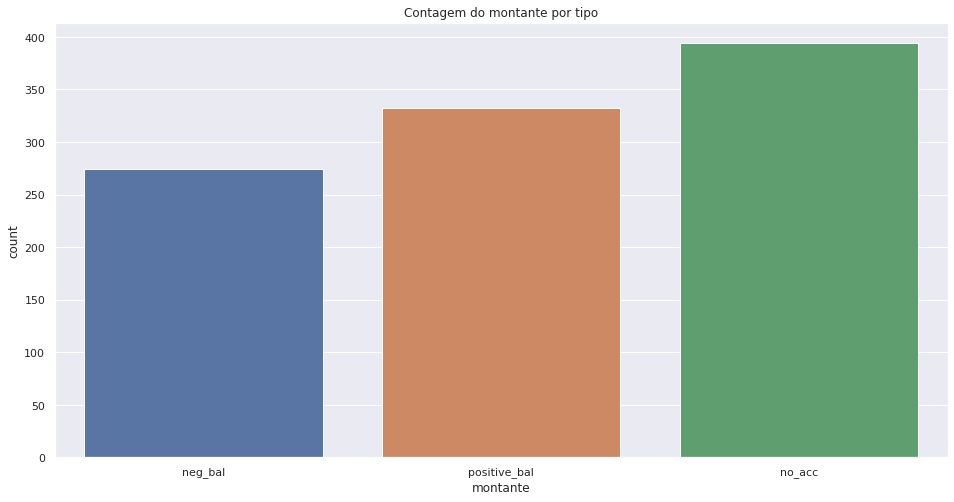

<Figure size 1152x576 with 0 Axes>

In [ ]:
# Estilizando plotagem
plt.rcParams.update({'text.color': "white"})
sns.set_theme()

fig, ax = plt.subplots(figsize = (16, 8))
a = sns.countplot(x = df.loc[:,'montante'], data = df)
a.set_title("Contagem do montante por tipo")
plt.show()
plt.savefig('montante_p_tipo')

**Análise de correlação entre as variáveis do dataset:**

In [ ]:
plt.figure(figsize = (15, 5))
sns.heatmap(df.corr(), annot=True)

In [ ]:
plt.figure(figsize = (15, 5))
sns.swarmplot(x = "historico_credito",y = "montante_credito",data = df)
plt.show()


#codigos_historico_de_creditos = {
#   "A30": "no credits taken/all credits paid back duly",
#   "A31": "all credits at this bank paid back duly",
#   "A32": "existing credits paid back duly till now",
#   "A33": "delay in paying off in the past",
#   "A34": "critical account/other credits existing (not at this bank)"
#}


In [ ]:
# Plotar uma distribuição univariada de observações
plt.figure(figsize = (15, 5))
sns.distplot(df.loc[:, 'idade'])
plt.show()

**Examinando a distribuição da coluna de risco:**

In [ ]:
df.risco.unique()

A coluna `risco` tem dois valores:
* 1: representando um bom empréstimo
* 2: representando um mau empréstimo (default).

A convenção usual é usar '1' para empréstimos ruins e '0' para empréstimos bons. Vamos substituir os valores para cumprir a convenção.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df.risco)
df.risco = le.transform(df.risco)
df.risco.head(5)

Uma compreensão da porcentagem de empréstimos bons e ruins seria útil para uma análise mais aprofundada. Um gráfico de pizza seria a melhor ferramenta para ajudar com isso.

In [ ]:

fig, ax = plt.subplots(figsize = (16, 8))
good_bad_per = round(((df.risco.value_counts() / df.risco.count()) * 100))
good_bad_per
plt.pie(good_bad_per, labels = ['Bons empréstimos', 'Maus empréstimos'], autopct = '%1.0f%%', startangle = 90)
plt.title('Porcentagem de bons e maus empréstimos', fontsize = 20)
plt.show()

O gráfico de pizza mostra que 30% dos solicitantes de empréstimos ficaram inadimplentes. A partir dessas informações, vemos que este é um problema de classe desequilibrado. Portanto, teremos que pesar as classes por sua representação nos dados para refletir esse desequilíbrio.

**Exploração das variáveis contínuas:**

Utilizaremos:
* Estatísticas resumidas
* Histogramas
* Box-plots

Observações:
     Uma olhada na distribuição das variáveis contínuas mostra que as variáveis estão em intervalos diferentes.
     O histograma sugere que a maioria das observações cai no primeiro quantil da variável. Isso pode ser verificado pelo box-plot.
     Os box-plots mostram que a maioria dos valores dos créditos estão entre 1000 a 4500 dólares. O valor do crédito é positivamente enviesado. A maior parte da duração do empréstimo é de 15 a 30 meses. A maioria dos requerentes de empréstimo tem idade entre 28 e 43 anos.

In [ ]:
df[['montante_credito','duracao','idade']].describe()

In [ ]:
df['montante_credito'] = np.log(df['montante_credito'])
df[['montante_credito','duracao','idade']].describe()

In [ ]:
# Estilizando plotagem
plt.rcParams.update({'text.color': "white"})
sns.set_theme()

fig, axes = plt.subplots(1, 3, figsize = (16, 8))
plt.suptitle('Histogramas das variáveis contínuas', fontsize = 20)
axes[0].hist(df['duracao'], facecolor = 'crimson', edgecolor = 'black', linewidth = 0.5)
axes[0].set_xlabel('No. de observações')
axes[0].set_ylabel('Anos')
axes[0].set_title('Duração do empréstimo');

axes[1].hist(df['montante_credito'], facecolor = 'crimson', edgecolor = 'black', linewidth = 0.5)
axes[1].set_xlabel('No. de observações')
axes[1].set_ylabel('Quantia de crédito (dólares)')
axes[1].set_title('Quantia de crédito');

axes[2].hist(df['idade'], facecolor = 'crimson', edgecolor = 'black', linewidth = 0.5)
axes[2].set_xlabel('No. de observações')
axes[2].set_ylabel('Idade')
axes[2].set_title('Idade');

In [ ]:
# Box-plots das variáveis contínuas
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.suptitle('BOX-PLOTS', fontsize = 20)
sns.boxplot(df['montante_credito'], ax=ax[0]);
sns.boxplot(df['duracao'], ax = ax[1], color = 'orange');
sns.boxplot(df['idade'], ax = ax[2], color = 'green');
plt.show()

**Relação entre o valor do crédito e a duração do reembolso:**

Utilizaremos:
*   Gráfico de dispersão

Observações:

O gráfico de dispersão mostra que, em geral, empréstimos maiores têm maior duração de reembolso. Casos em que grandes empréstimos são concedidos com curto prazo de reembolso acabaram por ser maus empréstimos.

In [ ]:
sns.set(rc = {'figure.figsize':(16, 8)})
sns.scatterplot(y = df.montante_credito, 
                x = df.duracao, 
                hue = df.risco, 
                s = 100, 
                )

plt.show()

**Exploração de variáveis categóricas:**

**Relação entre risco de crédito e habilidades do solicitante do empréstimo:**

Utilizaremos:
*   Gráfico de barras

Observações:

O gráfico mostra que os candidatos desempregados/não qualificados representam um alto risco.

In [ ]:
df.groupby('emprego')['risco'].value_counts().unstack(level = 1).plot.barh(stacked = True, figsize = (10, 6))
plt.show()

**Relação entre o valor do crédito e a duração do empréstimo:**

Utilizaremos:
*   Gráfico de linha

Observação:
Existe uma relação linear entre o valor do crédito e a duração. Quanto maior o valor do crédito, maior é a duração do reembolso.

In [ ]:
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(data = df, x = 'duracao', y = 'montante_credito', hue = 'risco', palette = 'deep');

**Relação entre o ativo mais valioso do candidato e o valor do crédito, risco de crédito:**

Utilizaremos:
*   Gráfico de barras empilhadas
*   Gráfico de dispersão

A codificação categórica usada nos gráficos é:

* A121: imóveis
* A122 : se não A121 : convênio de poupança/seguro de vida
* A123 : se não A121/A122 : carro ou outro, não no atributo 6
* A124: desconhecido/sem propriedade

Observações:

Os gráficos mostram que as pessoas com ativos imobiliários são muito arriscadas.

In [ ]:
df.groupby('propriedade')['risco'].value_counts().unstack(level = 1).plot.barh(stacked = True, figsize = (10, 6))
plt.show()

In [ ]:
sns.set(rc = {'figure.figsize':(16, 8)})
sns.scatterplot(y = df.montante_credito, 
                x = df.propriedade, 
                hue = df.risco, 
                s = 100, 
                );
plt.show()

## 4. Codificar variáveis categóricas

A maioria dos modelos de aprendizado de máquina não pode lidar com variáveis categóricas. Portanto, precisamos codificar as 13 variáveis categóricas que temos no conjunto de dados alemão.

In [ ]:
# Número de classes únicas em cada coluna de objeto
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Temos variáveis categóricas com 2 a 10 categorias. Vamos para a codificação de rótulo para variáveis com apenas duas categorias, enquanto para variáveis com mais de duas categorias, vamos para a codificação one-hot. Na codificação de rótulo, atribuímos cada categoria exclusiva em uma variável categórica com um número inteiro. Nenhuma nova coluna é criada. Na codificação one-hot, criamos uma nova coluna para cada categoria exclusiva em uma variável categórica. A única desvantagem da codificação one-hot é que o número de recursos (dimensões dos dados) pode explodir com variáveis categóricas com muitas categorias. Para lidar com isso, podemos executar a codificação one-hot seguida de PCA ou outros métodos de redução de dimensionalidade para reduzir o número de dimensões (enquanto ainda tentamos preservar as informações).

Para codificação de rótulo, usamos o LabelEncoder da biblioteca 'Scikit-Learn' e para codificação one-hot, a função 'get_dummies(df)' da biblioteca 'pandas'.

In [ ]:
# Codificador de rótulo 
le = LabelEncoder()
le_count = 0

# Iterando pelas colunas
for col in df:
    if df[col].dtype == 'object':
        # Se 2 ou menos categorias exclusivas
        if len(list(df[col].unique())) <= 2:
            # Treine nos dados de treinamento
            le.fit(df[col])
            # Transforme os dados de treinamento e teste
            df[col] = le.transform(df[col])
            
            # Acompanhe quantas colunas foram codificadas por rótulo
            le_count += 1
            
print('%d colunas foram codificadas por rótulo.' % le_count)

In [ ]:
# Codificador One-Hot
df = pd.get_dummies(df)

print('Tamanho dos recursos codificados:', df.shape)

Agora que codificamos as variáveis, vamos continuar com a análise exploratória dos dados.

**Correlação entre as variáveis:**

Vejamos as correlações entre os recursos e o destino usando o coeficiente de correlação de Pearson. Neste caso, uma correlação positiva representa a correlação com a inadimplência de crédito, enquanto uma correlação negativa representa a correlação com o reembolso do crédito.

Observações:

**Correlação positiva:**

Pessoas com contas correntes com saldo negativo (account_bal_A11) provavelmente deixarão de pagar o empréstimo.

Empréstimos de maior duração (duration) tendem a ficar inadimplentes.

**Correlação negativa:**

Pessoas sem conta corrente (account_bal_A14) provavelmente pagarão o empréstimo.

In [ ]:
# Encontre correlações com o 'target' e ordene
correlations = df.corr()['risco'].sort_values()

# Display correlations
print('Correlações positivas:')
print(correlations.tail(15))
print('\nCorrelações negativas:')
print(correlations.head(15))

Vejamos o mapa de calor de correlações significativas:

In [ ]:
# Extraia as variáveis significativamente correlacionadas
corr_data = df[['risco', 'montante_neg_bal','duracao','montante_no_acc']]
corr_data_corrs = corr_data.corr()


# Mapa de calor das correlações
sns.heatmap(corr_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Mapa de Calor: Correlações');

## 5. Engenharia de recursos

A engenharia de recursos refere-se à criação de recursos mais úteis a partir dos dados. Isso representa um dos padrões do aprendizado de máquina: a engenharia de recursos tem um retorno sobre o investimento maior do que a construção de modelos e o ajuste de hiperparâmetros. 

A engenharia de recursos refere-se a um processo geral e pode envolver tanto a construção de recursos: adicionar novos recursos a partir dos dados existentes, quanto a seleção de recursos: escolher apenas os recursos mais importantes ou outros métodos de redução de dimensionalidade. Existem muitas técnicas que podemos usar para criar recursos e selecionar recursos.

Para este problema, tentaremos construir características polinomiais.

**Recursos polinomiais:**

Aqui, encontramos interações entre os recursos significativos. A correlação entre os recursos de interação são verificados. Se os recursos de interação tiverem maior correlação com o destino em comparação com os recursos originais, eles serão incluídos no modelo de aprendizado de máquina, pois podem ajudar o modelo a aprender melhor.

In [ ]:
# Criando um novo dataframe para recursos polinomiais
poly_features = df[['duracao','montante_neg_bal','montante_no_acc']]
poly_target = df['risco']

from sklearn.preprocessing import PolynomialFeatures
                                  
# Cria o objeto polinomial com grau especificado
poly_transformer = PolynomialFeatures(degree = 2)
# Treinando os recursos polinomiais
poly_transformer.fit(poly_features)

# Transformando os recursos
poly_features = poly_transformer.transform(poly_features)
print('Tamanho dos recursos polinomiais:', poly_features.shape)

Isso cria um número considerável de novos recursos. Para obter os nomes, temos que usar o método ``get_feature_names`` de recursos polinomiais.

In [ ]:
poly_transformer.get_feature_names(input_features = ['duracao','montante_neg_bal','montante_no_acc'])

Agora, podemos ver se algum desses novos recursos está correlacionado com o risco:

In [ ]:
# Cria um dataframe para recursos polinomiais
poly_features = pd.DataFrame(
    poly_features, columns = poly_transformer.get_feature_names(
        ['duracao','montante_neg_bal','montante_no_acc']))

# Adicionamos o risco
poly_features['risco'] = poly_target

# Encontrando as correlações com o alvo
poly_corrs = poly_features.corr()['risco'].sort_values()

# Exibindo as correlações
poly_corrs

Todas as novas variáveis têm uma correlação maior (em termos de magnitude absoluta) com o risco do que as características originais. Adicionaremos esses recursos a uma cópia do conjunto de dados alemão e avaliaremos modelos com e sem os recursos.

In [ ]:
list(poly_features)

In [ ]:
# Excluindo colunas duplicadas em poly_features

for i in list(poly_features.columns):
  for j in list(df.columns):
    if (i == j):
      poly_features.drop(labels = i, axis = 1, inplace = True)

poly_features.drop(labels = '1', axis = 1, inplace = True)
list(poly_features)

In [ ]:
# Tamanho do dataframe original
print('Tamanho do dataframe original: ', df.shape)

# Mesclar recursos polnomiais no dataframe
german_df_poly = df.merge(poly_features, left_index = True, right_index = True, how = 'left')

# Printando o novo tamanho
print('Tamanho dos recursos polinomiais mesclados: ', german_df_poly.shape)

In [ ]:
german_df_poly.isna().any().any()

## 6. Divisão dos dados de teste e treino

In [ ]:
from sklearn.model_selection import train_test_split
x, y = df.drop('risco', axis = 1), df['risco']
x.shape, y.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state = 42)
x_train.shape, x_test.shape

In [ ]:
x_train

In [ ]:
y_train

## 7. Modelos

**Critério de avaliação:**

Vamos dar uma olhada nas diferentes opções disponíveis de classificação:

|Critério de avaliação| Descrição
|:---|---
|Acurácia| (Verdadeiro positivo + Verdadeiro negativo) / Total observações
|Precisão| Verdadeiro positivo / Total da predição positiva
|Recall| Verdadeiro positivo / Total dos atuais positivos
|F1 | 2 * Precisão * Recall / (Precisão + Recall)
|AUC ROC| Área abaixo da curva ROC (TPR Vs. FPR para todos os limites de classificação)

Acurácia: O conjunto de dados alemão é um conjunto de dados desequilibrado. A acurácia daria uma pontuação alta ao prever a classe majoritária, mas não conseguiria prever a classe minoritária, que são os inadimplentes. Portanto, essa não é uma métrica adequada para esse conjunto de dados.

Precisão: A precisão é uma boa métrica quando os custos de falsos positivos são altos. Exemplo, detecção de spam de e-mail.

Recall: Esta métrica é adequada quando os custos de falsos negativos são altos. Exemplo, prevendo um inadimplente como não inadimplente. Isso custa enorme perda para o banco. Portanto, esta é uma métrica adequada para o nosso caso.

F1: Medida de precisão e recall.

AUC ROC: É o gráfico de TPR vs FPR. Todos os outros critérios discutidos aqui assumem 0,5 como o limite de decisão para a classificação. No entanto, pode não ser sempre verdade. A AUC nos ajuda a avaliar o desempenho do modelo para todos os limites de classificação. Quanto maior o valor da métrica AUC, melhor o modelo.

Taxa de verdadeiro positivo (TPR) = TP / Total real positivo

Taxa de falsos positivos (FPR) = FP / Total real negativo

Usaremos a acurácia e o F1 como critério de métrica.

**Linha de base:**

In [ ]:
y.value_counts(normalize = True)

Isso significa que a acurácia da linha de base é de 70%, ou seja, mesmo classificando todas as amostras como inadimplentes, teremos 70% de acurácia.

**Modelos sem ajuste:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, accuracy_score, precision_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

In [ ]:
# Preparando modelos
models = []
models.append(('DT', DecisionTreeClassifier(random_state = 42)))
models.append(('LR', LogisticRegression(random_state = 42)))
models.append(('RF', RandomForestClassifier(random_state = 42)))

# evaluate each model in turn
results_accuracy = []
results_f1 = []
names = []
scoring = ['accuracy', 'f1']

for name, model in models:
        # split dataset into k folds. use one fold for validation and remaining k-1 folds for training
        skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
        # Evaluate a score by cross-validation. Returns array of scores of the model for each run of the cross validation.
        #cv_results = cross_val_score(model, x_train, y_train, cv=skf, scoring=scoring)
        cv_results = cross_validate(model, x_train, y_train, cv = skf, scoring = scoring)
        results_accuracy.append(cv_results['test_accuracy'])
        results_f1.append(cv_results['test_f1'])
        names.append(name)
        msg = "%s - Acurácia : %f / F1 : %f" % (name, cv_results['test_accuracy'].mean(),cv_results['test_f1'].mean())
        print(msg)
        
# Boxplot - Comparação algoritmos
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Comparação de pontuação - Acurácia')
ax = fig.add_subplot(111)
plt.boxplot(results_accuracy, showmeans = True)
ax.set_xticklabels(names)
plt.show();

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Comparação de pontuação - F1')
ax = fig.add_subplot(111)
plt.boxplot(results_f1, showmeans = True)
ax.set_xticklabels(names)
plt.show();

## 7.1 Árvore de Decisão (*Decision Tree*)

**Ajuste manual:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inicializando a árvore
tree = DecisionTreeClassifier(random_state = 42)

# Ajuste-previsão
tree.fit(x_train, y_train)

# Predição
pred_test = tree.predict(x_test)

In [ ]:
pred_test.shape, y_test.shape

Vamos verificar a acurácia dos dados previstos:

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics 
print('Acurácia:', accuracy_score(y_test, pred_test))
print('F1-score:', f1_score(y_test, pred_test))

Vamos verificar a pontuação do cross val para a árvore:

In [ ]:
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
val_scores = cross_val_score(estimator = tree, X = x_train, y = y_train, cv = skf)
val_scores

In [ ]:
val_scores.mean()

In [ ]:
# Para exibir o progresso de um loop
from tqdm import tqdm_notebook

In [ ]:
# Ajustando o modelo para diferentes valores de max_depth sem usar GridSearchCV
cv_accuracies_by_depth, test_accuracies_by_depth = [], []
max_depth_values = np.arange(2,11)

# Para cada valor de max_depth
for curr_max_depth in tqdm_notebook(max_depth_values):
  tree = DecisionTreeClassifier(random_state = 42, max_depth = curr_max_depth)
  
  # Realizando validação cruzada
  val_scores = cross_val_score(estimator = tree, X = x_train, y = y_train, cv = skf)
  cv_accuracies_by_depth.append(val_scores.mean())

  # Avaliar o modelo com um teste de teste
  tree.fit(x_train, y_train)
  curr_pred = tree.predict(x_test)
  test_accuracies_by_depth.append(accuracy_score(curr_pred, y_test))

In [ ]:
# validation curve
plt.plot(max_depth_values, cv_accuracies_by_depth, label='cv')
plt.plot(max_depth_values, test_accuracies_by_depth, label='test')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('Acurácia')
plt.title('Curva de validação da árvore de decisão para max_depth', fontsize = 16);

Um max_depth de 3 parece dar o melhor resultado. Max_depth maior que 9 parece estar muito ajustada.

Vamos agora visualizar a árvore com max_depth = 3:

In [ ]:
# Árvore ajustada
tree = DecisionTreeClassifier(random_state = 42, max_depth = 3).fit(x_train, y_train)

In [ ]:
# Gerar gráfico localmente
from io import StringIO
import pydotplus
from ipywidgets import Image
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(decision_tree = tree, out_file = dot_data, 
                filled = True, feature_names = x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value = graph.create_png())


Observações: As caixas de laranja claro são predominantemente inadimplentes enquanto as de azul claro são predominantemente clientes que quitaram os empréstimos.

Quão boa é essa acurácia? Vamos olhar para a linha de base.

Ajustando usando GridSearchCV:

In [ ]:
from sklearn.model_selection import GridSearchCV

GridSearchCV é usado para pesquisar a combinação ideal de hiperparâmetros.

Vamos realizar a validação cruzada estratificada e passá-la como um objeto para o GridSearchCV. Ele retorna as melhores configurações para a árvore.

In [ ]:
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

Aqui, obtemos max_depth=8 que é um valor limítrofe no intervalo que demos (2,11). Portanto, tentamos com um intervalo ligeiramente diferente para o lado do valor mais alto. o melhor valor de min_samples_leaf = 5 que está no meio do intervalo fornecido. Por isso, seguiremos em frente.

In [ ]:
params = {'max_depth': np.arange(2,11), 'min_samples_leaf': np.arange(2,11)}
best_tree = GridSearchCV(tree, param_grid = params, cv = skf, n_jobs = -1, verbose = 1)

Não vamos ajustar o conjunto de dados de treinamento no melhor modelo de árvore que encontramos. Ele treinará o modelo 810 vezes (9 valores de max_depth x 9 valores de min_samples_leaf x 10 vezes cv = 810). jobs = -1 indicam usar toda a CPU disponível para computação paralela.

In [ ]:
best_tree.fit(x_train, y_train)

In [ ]:
best_tree.best_params_

In [ ]:
best_tree.best_estimator_

Avaliação de validação cruzada:

In [ ]:
# Avaliação do cross-val da qualidade do modelo
print(f'{best_tree.best_score_:.3f}')

Vamos verificar a pontuação de acurácia e F1 usando previsões com o best_tree que acabamos de modelar:

In [ ]:
pred_test_better = best_tree.predict(x_test)
print('Acurácia:', accuracy_score(y_test, pred_test_better))
print('F1-score:', f1_score(y_test, pred_test_better))


O ajuste melhorou o modelo.

## 7.2 Regressão Logística:

In [ ]:
from sklearn.metrics import recall_score, roc_auc_score
tuned_models_test = []
tuned_models_train = []

# Crie o modelo com o parâmetro de regularização especificado
log_reg = LogisticRegression(C = 0.0001, random_state = 42)

# Train on the training data
log_reg.fit(x_train, y_train)

# Avaliar no conjunto de dados de teste
recall_test = recall_score(y_test, log_reg.predict(x_test))
roc_test = roc_auc_score(y_test, log_reg.predict_proba(x_test)[:, 1])
print('LR',' recall_test:', round(recall_test, 2),' auc_roc_test:', round(roc_test, 2))
tuned_models_test.append(('LR',' recall_test:', round(recall_test, 2),' auc_roc_test:', round(roc_test, 2)))

# Avaliar no conjunto de dados de treinamento
roc_train = cross_val_score(log_reg, x_train, y_train, cv=skf, scoring = 'roc_auc').mean()
recall_train = cross_val_score(log_reg, x_train, y_train, cv=skf, scoring = 'recall').mean()
print('LR',' recall_train:', round(recall_train,2),' auc_roc_train:', round(roc_train,2))
tuned_models_train.append(('LR',' recall_train:', round(recall_train, 2),' auc_roc_train:', round(roc_train, 2)))

In [ ]:
print(classification_report(y_test, log_reg.predict(x_test)))
print('Acurácia:', accuracy_score(y_test, pred_test))
print('F1-score:', f1_score(y_test, pred_test))

In [ ]:
from sklearn.metrics import roc_curve

# Gerar valores da curva ROC: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict(x_test))

# Plotando a curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Taxa - Falso positivo')
plt.ylabel('Taxa - Verdadeiro positivo')
plt.title('Curva ROC')
plt.show()

## 7.3 Random Forest

In [ ]:
# create model with default parameters- baseline
rf_baseline = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train it on the training set
cv_result_baseline = cross_val_score(rf_baseline, x_test, y_test, cv=skf)

# Evalute the results (cross-val)
print("CV acurácia score: {:.2f}%".format(cv_result_baseline.mean() * 100))

In [ ]:
# train model 
rf_baseline.fit(x_train, y_train)

pred_test_rf= rf_baseline.predict(x_test)
print("Teste acurácia score: {:.2f}%".format((accuracy_score(pred_test_rf, y_test) * 100)))

Agora, vamos tentar melhorar este resultado. Vamos começar com o número de árvores:

In [ ]:
# Create lists to save the values of accuracy on training and test sets
train_acc = []
test_acc = []
temp_train_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

In [ ]:
for ntrees in trees_grid:
    rf = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1).fit(x_train, y_train)
    temp_train_acc = cross_val_score(rf, x_test, y_test, cv = skf)
    train_acc.append(temp_train_acc.mean())
    test_acc.append(accuracy_score(rf.predict(x_test), y_test))

In [ ]:
print("A melhor CV acurácia é {:.2f}% com {} árvores".format(max(test_acc) * 100, 
                                                        trees_grid[np.argmax(test_acc)]))

In [ ]:
plt.plot(trees_grid, train_acc, label = 'treino')
plt.plot(trees_grid, test_acc, label = 'teste')
plt.legend()
plt.xlabel('No. de árvores (n_estimadores)')
plt.ylabel('Acurácias')
plt.title('Random-Forest: Acurácia vs No de Árvores');

A melhor acurácia é alcançada com 50 árvores. Para evitar overfitting (que acontece em n_estimadores = 100), precisamos adicionar parâmetros de regularização ao nosso modelo.

In [ ]:
# Criando listas para salvar os valores de acurácia nos conjuntos de treinamento e teste
train_acc = []
test_acc = []
temp_train_acc
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

for max_depth in max_depth_grid:
    rf = RandomForestClassifier(n_estimators = 50, random_state = 42, n_jobs = -1, max_depth = max_depth).fit(x_train, y_train)
    temp_train_acc = cross_val_score(rf, x_test, y_test, cv=skf)
    train_acc.append(temp_train_acc.mean())
    test_acc.append(accuracy_score(rf.predict(x_test), y_test))

print("Melhor CV acurácia é {:.2f}% com {} max_depth".format(max(test_acc)*100, 
                                                        max_depth_grid[np.argmax(test_acc)]))

In [ ]:
plt.plot(max_depth_grid, train_acc, label = 'treino')
plt.plot(max_depth_grid, test_acc, label = 'teste')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Acurácias')
plt.title('Random-Forest: Acurácia vs max_depth');

In [ ]:
# Criando listas para salvar os valores de acurácia e f1-measure nos conjuntos de treinamento e teste
train_acc = []
test_acc = []
temp_train_acc
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

for min_sample in min_samples_leaf_grid:
    rf = RandomForestClassifier(n_estimators = 50, random_state = 42, n_jobs = -1, min_samples_leaf = min_sample).fit(x_train, y_train)
    temp_train_acc = cross_val_score(rf, x_test, y_test, cv=skf)
    train_acc.append(temp_train_acc.mean())
    test_acc.append(accuracy_score(rf.predict(x_test), y_test))

print("Melhor CV acurácia é {:.2f}% com {} min_sample_leaf".format(max(test_acc)*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc)]))

plt.plot(min_samples_leaf_grid, train_acc, label = 'treino')
plt.plot(min_samples_leaf_grid, test_acc, label = 'teste')
plt.legend()
plt.xlabel('min_sample_leaf')
plt.ylabel('Acurácias')
plt.title('Random-Forest: Acurácia vs min_sample_leaf');

In [ ]:
# Criando listas para salvar os valores de acurácia nos conjuntos de treinamento e teste
train_acc = []
test_acc = []
temp_train_acc
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

for max_feature in max_features_grid:
    rf = RandomForestClassifier(n_estimators = 50, random_state = 42, n_jobs=-1, max_features = max_feature).fit(x_train, y_train)
    temp_train_acc = cross_val_score(rf, x_test, y_test, cv = skf)
    train_acc.append(temp_train_acc.mean())
    test_acc.append(accuracy_score(rf.predict(x_test), y_test))

print("Melhor CV acurácia é {:.2f}% com {} max_features".format(max(test_acc)*100, 
                                                        max_features_grid[np.argmax(test_acc)]))
print('F1-score:', f1_score(rf.predict(x_test), y_test))
plt.plot(max_features_grid, train_acc, label = 'treino')
plt.plot(max_features_grid, test_acc, label = 'teste')
plt.legend()
plt.xlabel('max_features')
plt.ylabel('Acurácias')
plt.title('Random-Forest: Acurácia vs max_features');

In [ ]:
# Inicializando o conjunto de parâmetros para busca exaustiva e ajuste
parameters = {'max_features': [7, 10, 16, 18], 
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [15, 20, 24, 27]}
rf = RandomForestClassifier(n_estimators = 50, random_state = 42, n_jobs = -1)
gcv = GridSearchCV(rf, parameters, n_jobs = -1, cv = skf, verbose = 1)
gcv.fit(x_train, y_train)

In [ ]:
gcv.best_params_, gcv.best_score_

## Sumário:

|MODELO |TESTE DE ACURÁCIA 
|:---|---
| Decision Tree|76%
|Regressão logística|71% 
| Random Forest|80%

## Inferências e Conclusão

A partir da exploração do conjunto de dados de crédito alemão, pode-se inferir que

* empréstimos de maior valor de crédito concedidos a candidatos que não possuem bens ou apenas um carro como seu bem mais valioso estão em alto risco.
* empréstimos concedidos para fins educacionais são arriscados
* os candidatos que estão desempregados ou com menos de 1 ano de trabalho apresentam maior risco. Na mesma linha, candidatos não qualificados também representam um risco maior
* existe uma relação linear entre o valor do crédito e a duração do reembolso. Créditos mais altos tendem a ter maior duração